# Scope and description

The data created by this notebook is for testing an object containing multiple diverse spatial elements.

Elements contained:
- 2D single-scale image (cyx);
- 2D multi-scale image (cyx);
- 2D single-scale labels (yx);
- 2D multi-scale labels (yx);
- 2D points;
- circles;
- polygons;
- multipolygons.

Annotations contained:
- table annotating the 2D labels.

Note, this object is not meant to contain everything, example of features that are not covered by this notebook are:
- multiple transformations (transformation here are all `Identity()`);
- 3D images, labels, points
- channel names for images
- table annotating multiple elements
- elements containing annotation columns

# Prepare the data

In [1]:
NAME = 'multiple_elements'

In [2]:
import spatialdata as sd
import spatialdata_plot
from spatialdata.datasets import blobs
from io_utils import delete_old_data, write_sdata_and_check_consistency

delete_old_data(name=NAME)
sdata = blobs(length=64)
sdata

/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/Users/macbook/embl/projects/basel/spatialdata/src/spatialdata/_core/operations/aggregate.py:244: UserWarning: Converting `region_key: region` to categorical dtype.
  table = TableModel.parse(table, region=shapes_name, region_key=region_key, instance_key=instance_key)


SpatialData object with:
├── Images
│     ├── 'blobs_image': SpatialImage[cyx] (3, 64, 64)
│     └── 'blobs_multiscale_image': MultiscaleSpatialImage[cyx] (3, 64, 64), (3, 32, 32), (3, 16, 16)
├── Labels
│     ├── 'blobs_labels': SpatialImage[yx] (64, 64)
│     └── 'blobs_multiscale_labels': MultiscaleSpatialImage[yx] (64, 64), (32, 32), (16, 16)
├── Points
│     └── 'blobs_points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     ├── 'blobs_circles': GeoDataFrame shape: (5, 2) (2D shapes)
│     ├── 'blobs_multipolygons': GeoDataFrame shape: (5, 1) (2D shapes)
│     └── 'blobs_polygons': GeoDataFrame shape: (5, 1) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 10 × 3
    obs: 'instance_id', 'region'
    uns: 'spatialdata_attrs': AnnData (10, 3)
with coordinate systems:
▸ 'global', with elements:
        blobs_image (Images), blobs_multiscale_image (Images), blobs_labels (Labels), blobs_multiscale_labels (Labels), blobs_points (Points), blobs_circl

# Read-write and IO validation

In [3]:
write_sdata_and_check_consistency(sdata=sdata, name=NAME)

no parent found for <ome_zarr.reader.Label object at 0x293407ca0>: None
no parent found for <ome_zarr.reader.Label object at 0x293404f10>: None


INFO     The Zarr file used for backing will now change from multiple_elements.zarr to                             
         /tmp/tmpv1cupwu1/multiple_elements2.zarr                                                                  


no parent found for <ome_zarr.reader.Label object at 0x29605a0e0>: None
no parent found for <ome_zarr.reader.Label object at 0x2960588b0>: None


# Plot the data

## Single scale images, single scale labels, points

/Users/macbook/miniconda3/envs/ome/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/macbook/embl/projects/basel/spatialdata-plot/src/spatialdata_plot/pl/render.py:335: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatter(


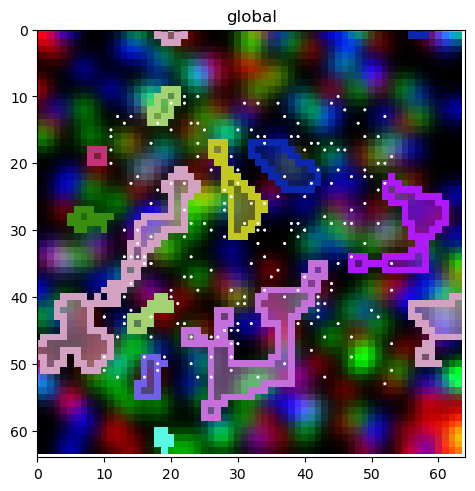

In [4]:
sdata.pl.render_images('blobs_image').pl.render_labels('blobs_labels').pl.render_points('blobs_points', na_color='w').pl.show()

## Lables annoted by the table (var)

In [5]:
sdata.table.obs

,instance_id,region
3,3,blobs_labels
4,4,blobs_labels
5,5,blobs_labels
8,8,blobs_labels
10,10,blobs_labels
11,11,blobs_labels
12,12,blobs_labels
13,13,blobs_labels
15,15,blobs_labels
16,16,blobs_labels


In [6]:
sdata.table.var_names

Index(['channel_0_sum', 'channel_1_sum', 'channel_2_sum'], dtype='object')

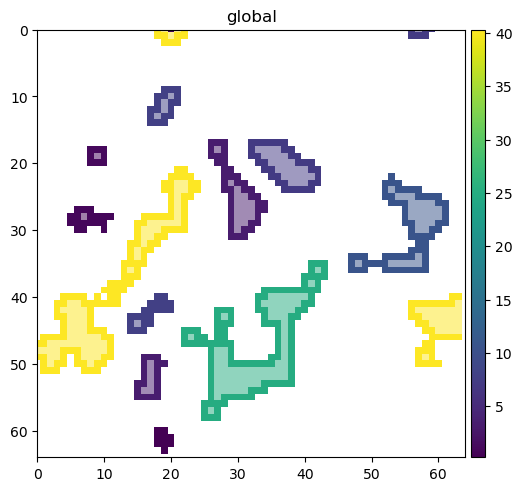

In [7]:
sdata.pl.render_labels('blobs_labels', color='channel_0_sum').pl.show()

## Shapes: circles, polygons, multipolygons

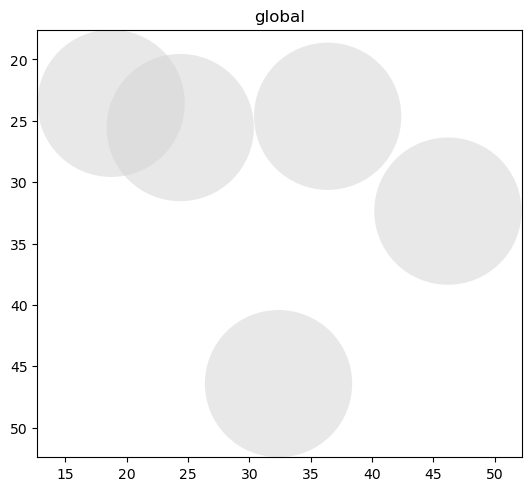

In [8]:
sdata.pl.render_shapes('blobs_circles', fill_alpha=0.5).pl.show()

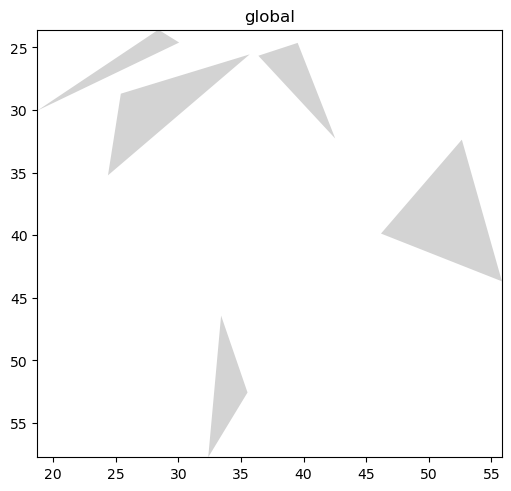

In [9]:
sdata.pl.render_shapes('blobs_polygons').pl.show()

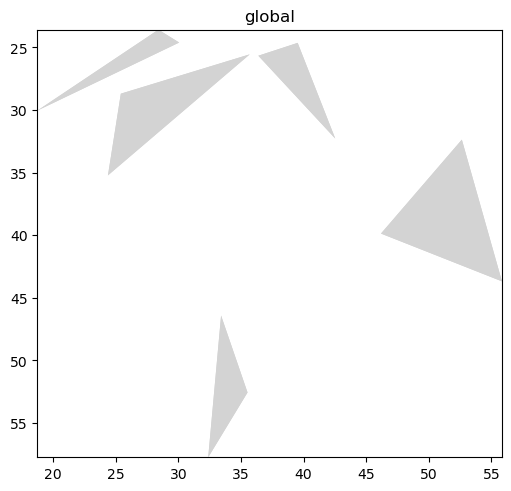

In [10]:
sdata.pl.render_shapes('blobs_multipolygons').pl.show()